# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/cextension.py:31: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
genes = torch.load(
#    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt'
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu')
)['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
   # 'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [5]:
adata.obs['current'] = "other"
adata.obs.loc[adata.obs['cell_type']=="podocyte", 'current'] = "podocyte"

... storing 'current' as categorical


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


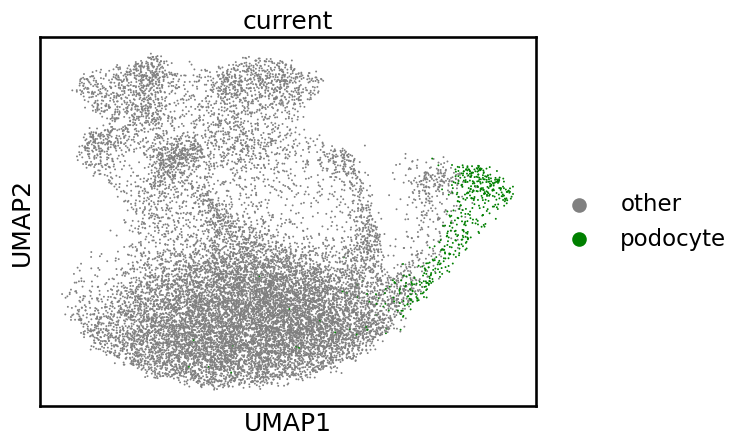

In [6]:
sc.pl.umap(adata, color='current', palette=['grey', 'green'])


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


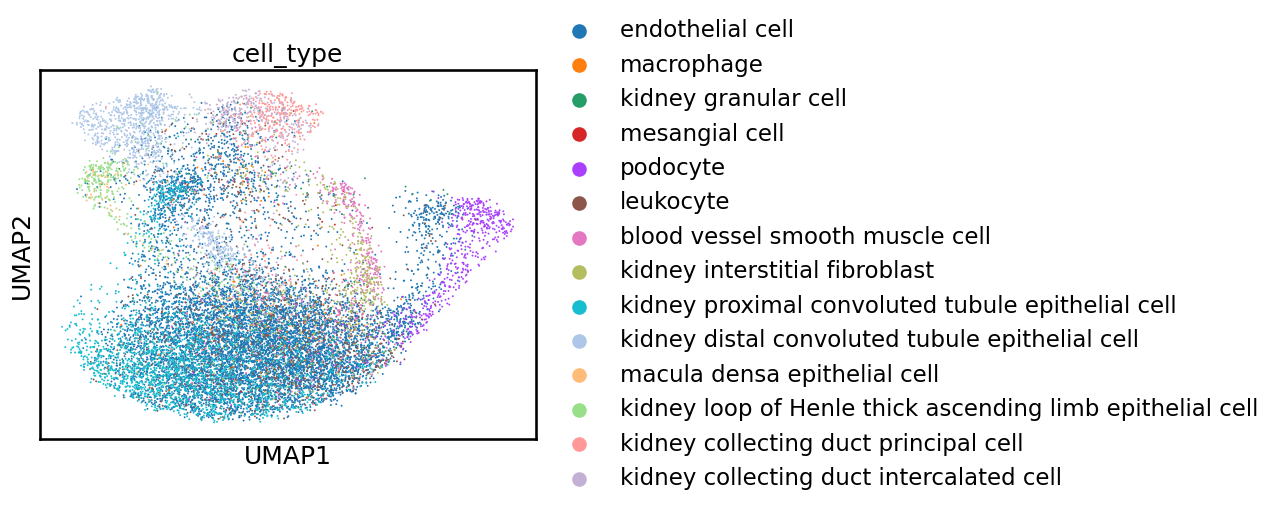

In [7]:
sc.pl.umap(adata, color=['cell_type'])

kidney distal convoluted tubule epithelial cell
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 75.77 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


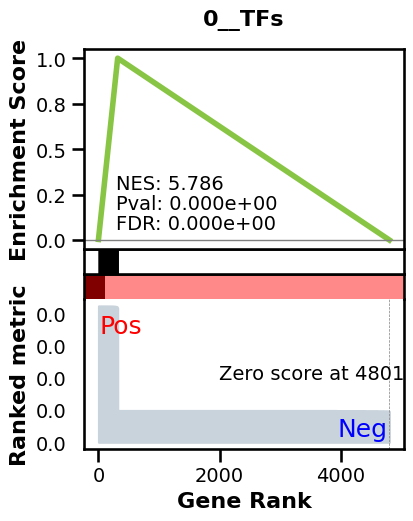

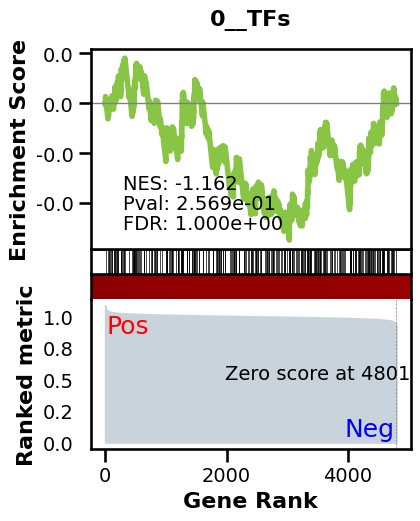

_________________________________________
TF specific enrichment


found some significant results for  12.903225806451612 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3426 genes
intersection pct: 0.7134527280299875
precision:  0.004695277682597477 
recall:  0.3366297778824268 
random precision: 0.001085814360770578


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 50.94it/s]

  9%|▉         | 12/128 [00:00<00:02, 50.97it/s]

 14%|█▍        | 18/128 [00:00<00:02, 50.96it/s]

 19%|█▉        | 24/128 [00:00<00:02, 50.99it/s]

 23%|██▎       | 30/128 [00:00<00:01, 51.03it/s]

 28%|██▊       | 36/128 [00:00<00:01, 50.96it/s]

 33%|███▎      | 42/128 [00:00<00:01, 50.78it/s]

 38%|███▊      | 48/128 [00:00<00:01, 50.90it/s]

 42%|████▏     | 54/128 [00:01<00:01, 50.91it/s]

 47%|████▋     | 60/128 [00:01<00:01, 50.79it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 50.72it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 50.67it/s]

 61%|██████    | 78/128 [00:01<00:00, 50.70it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 50.61it/s]

 70%|███████   | 90/128 [00:01<00:00, 50.70it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 50.76it/s]

 80%|███████▉  | 102/128 [00:02<00:00, 50.74it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 50.71it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 50.84it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 50.83it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 50.93it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 50.69it/s]

Area Under Precision-Recall Curve (AUPRC):  0.002613214242507992
EPR: 6.13938154134158


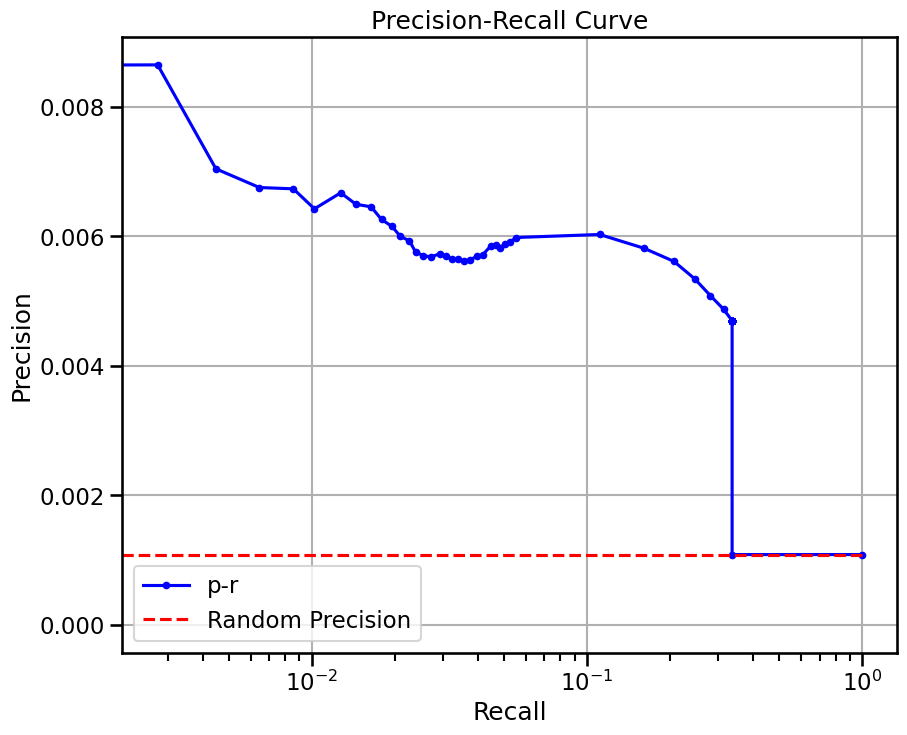

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 304.30 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


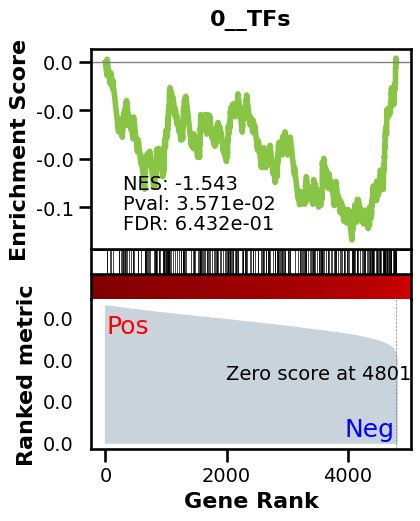

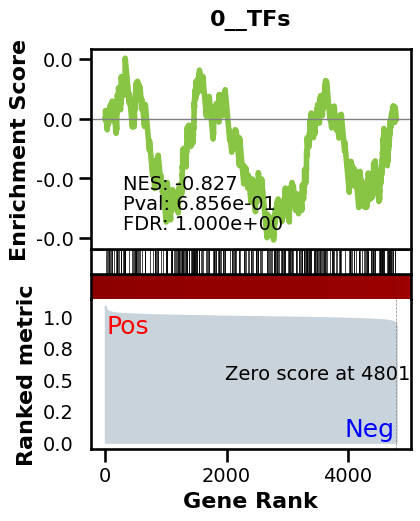

_________________________________________
TF specific enrichment


found some significant results for  3.225806451612903 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3426 genes
intersection pct: 0.7134527280299875
precision:  0.0011248232113194498 
recall:  0.7383250922219606 
random precision: 0.001085814360770578


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 51.69it/s]

  9%|▉         | 12/128 [00:00<00:02, 51.50it/s]

 14%|█▍        | 18/128 [00:00<00:02, 51.47it/s]

 19%|█▉        | 24/128 [00:00<00:02, 50.74it/s]

 23%|██▎       | 30/128 [00:00<00:01, 50.68it/s]

 28%|██▊       | 36/128 [00:00<00:01, 50.59it/s]

 33%|███▎      | 42/128 [00:00<00:01, 50.53it/s]

 38%|███▊      | 48/128 [00:00<00:01, 50.47it/s]

 42%|████▏     | 54/128 [00:01<00:01, 50.41it/s]

 47%|████▋     | 60/128 [00:01<00:01, 50.40it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 50.38it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 50.44it/s]

 61%|██████    | 78/128 [00:01<00:00, 50.43it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 50.47it/s]

 70%|███████   | 90/128 [00:01<00:00, 50.41it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 50.43it/s]

 80%|███████▉  | 102/128 [00:02<00:00, 50.46it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 50.56it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 50.61it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 50.66it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 50.76it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 50.60it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001078113980356542
EPR: 1.5922869829896975


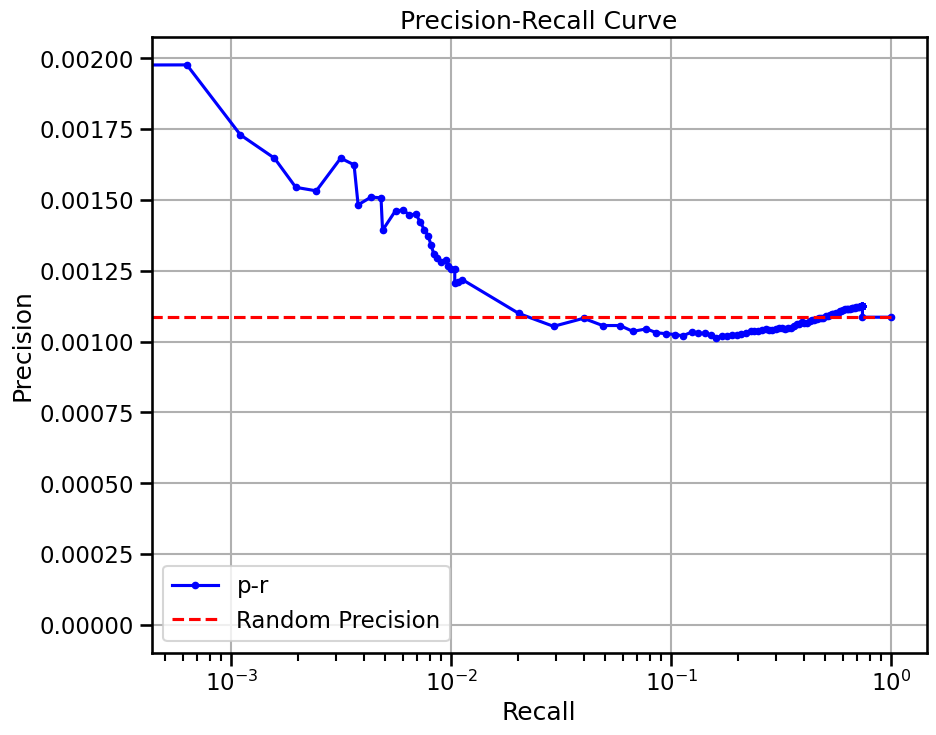

kidney loop of Henle thick ascending limb epithelial cell
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 37.64 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


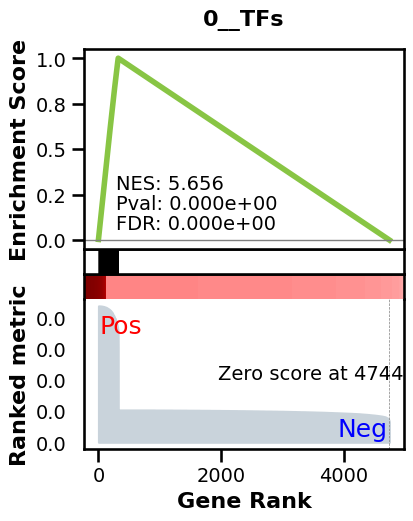

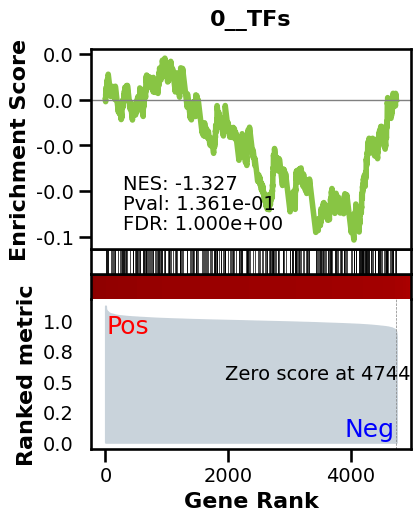

_________________________________________
TF specific enrichment


found some significant results for  2.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3339 genes
intersection pct: 0.7036880927291886
precision:  0.006075513661165209 
recall:  0.39915530527563725 
random precision: 0.0012108833796207323


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.59it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.51it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.14it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.38it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.48it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.54it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.61it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.68it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.70it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.70it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.74it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.73it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.41it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.48it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.55it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.64it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.66it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.69it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.74it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.77it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.75it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.60it/s]

Area Under Precision-Recall Curve (AUPRC):  0.003188724252873047
EPR: 4.068592592017627


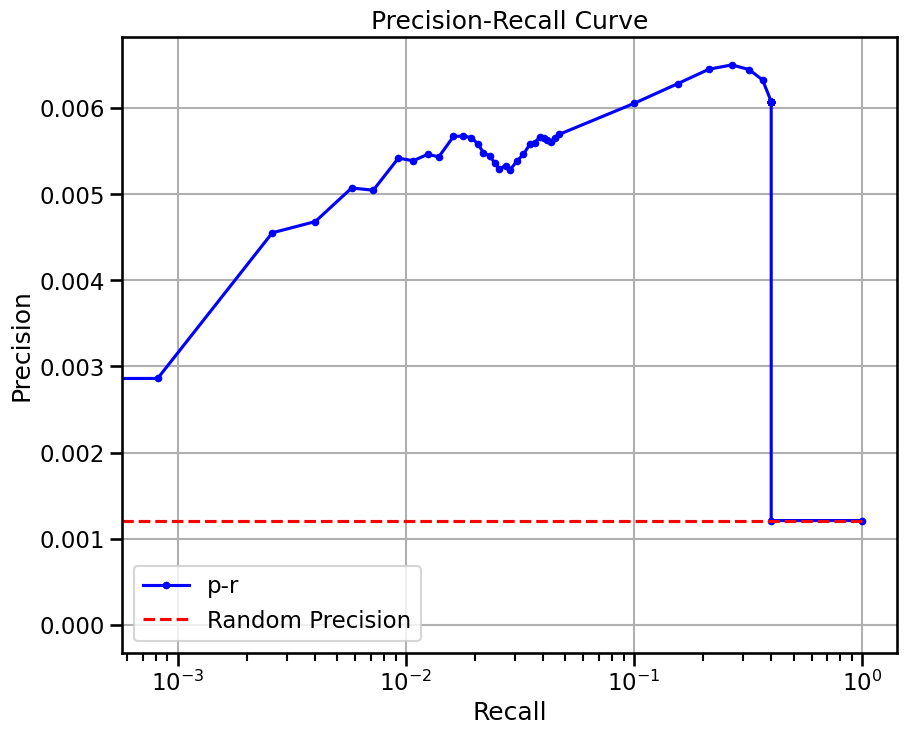

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 73.69 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


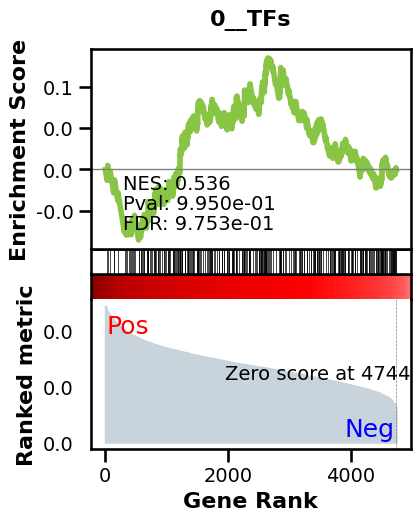

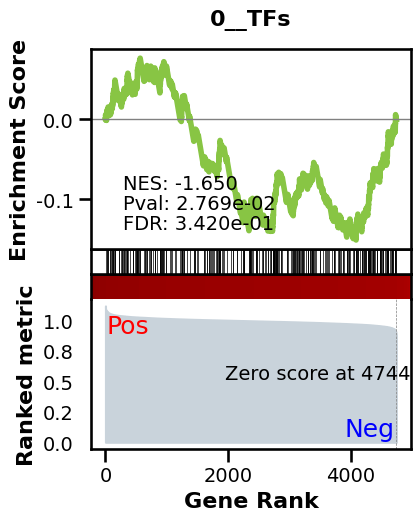

_________________________________________
TF specific enrichment


found some significant results for  7.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3339 genes
intersection pct: 0.7036880927291886
precision:  0.0012890039634019022 
recall:  0.39337581505631297 
random precision: 0.0012108833796207323


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.03it/s]

  9%|▉         | 12/128 [00:00<00:02, 53.73it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.74it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.43it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.20it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.09it/s]

 33%|███▎      | 42/128 [00:00<00:01, 51.95it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.10it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.03it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.06it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.12it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.14it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.13it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.20it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.16it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.11it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.21it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.18it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.18it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.20it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.28it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.24it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001183492097541026
EPR: 0.4277485243025867


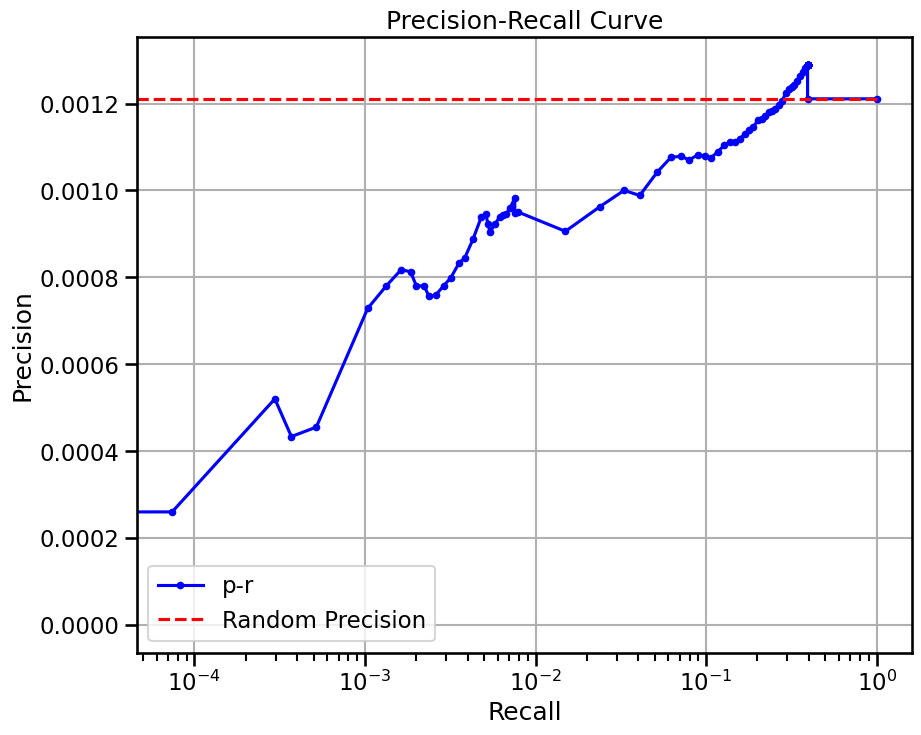

kidney collecting duct principal cell
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 46.92 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


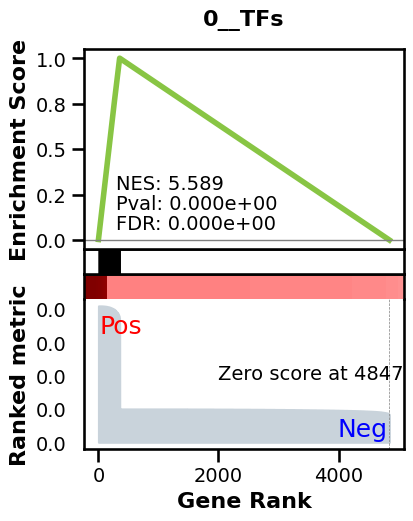

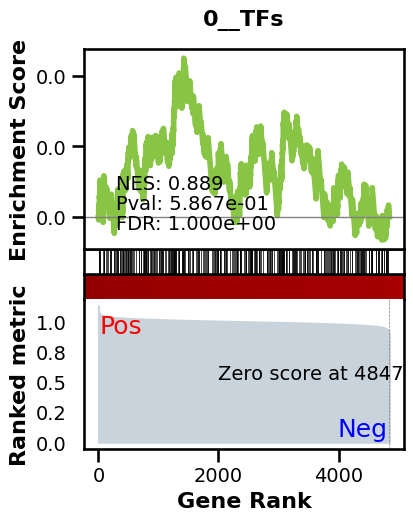

_________________________________________
TF specific enrichment


found some significant results for  1.4285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3500 genes
intersection pct: 0.721947194719472
precision:  0.007196103881186754 
recall:  0.44093841642228737 
random precision: 0.0013922345159841588


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 47.91it/s]

  8%|▊         | 10/128 [00:00<00:02, 47.87it/s]

 12%|█▏        | 15/128 [00:00<00:02, 47.78it/s]

 16%|█▌        | 20/128 [00:00<00:02, 47.71it/s]

 20%|█▉        | 25/128 [00:00<00:02, 47.60it/s]

 23%|██▎       | 30/128 [00:00<00:02, 47.61it/s]

 27%|██▋       | 35/128 [00:00<00:01, 47.55it/s]

 31%|███▏      | 40/128 [00:00<00:01, 47.55it/s]

 35%|███▌      | 45/128 [00:00<00:01, 47.55it/s]

 39%|███▉      | 50/128 [00:01<00:01, 47.51it/s]

 43%|████▎     | 55/128 [00:01<00:01, 47.55it/s]

 47%|████▋     | 60/128 [00:01<00:01, 47.53it/s]

 51%|█████     | 65/128 [00:01<00:01, 47.54it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 47.70it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 47.69it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 47.70it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 47.71it/s]

 70%|███████   | 90/128 [00:01<00:00, 47.73it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 47.67it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 47.76it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 47.87it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 47.82it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 47.79it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 47.81it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 47.32it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 47.63it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005001786682787819
EPR: 10.90675026215496


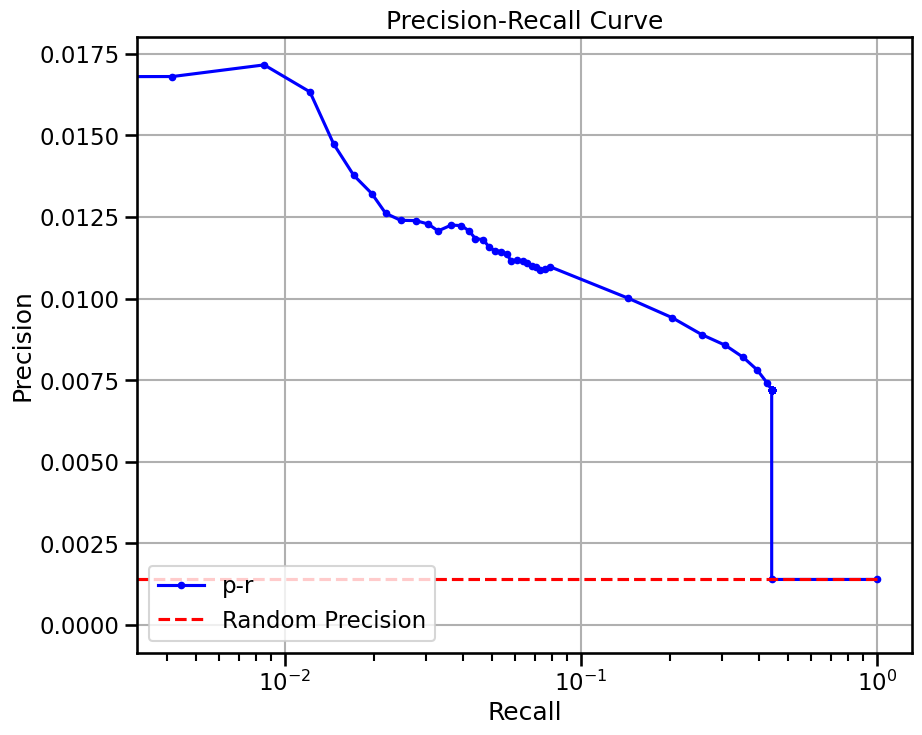

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 108.29 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


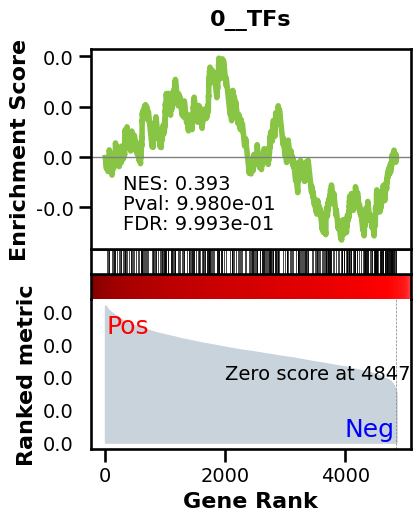

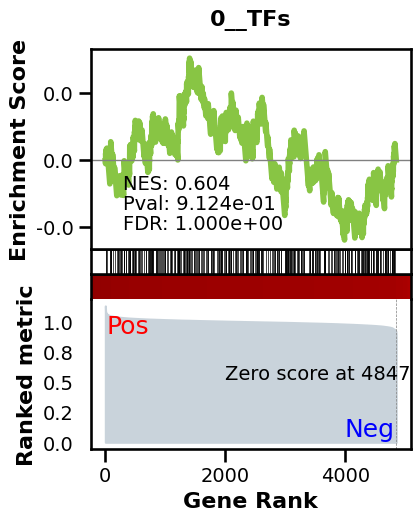

_________________________________________
TF specific enrichment


found some significant results for  4.285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3500 genes
intersection pct: 0.721947194719472
precision:  0.0015625245357461892 
recall:  0.5194134897360704 
random precision: 0.0013922345159841588


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 46.76it/s]

  8%|▊         | 10/128 [00:00<00:02, 46.81it/s]

 12%|█▏        | 15/128 [00:00<00:02, 46.89it/s]

 16%|█▌        | 20/128 [00:00<00:02, 46.81it/s]

 20%|█▉        | 25/128 [00:00<00:02, 46.80it/s]

 23%|██▎       | 30/128 [00:00<00:02, 46.74it/s]

 27%|██▋       | 35/128 [00:00<00:01, 46.89it/s]

 31%|███▏      | 40/128 [00:00<00:01, 46.90it/s]

 35%|███▌      | 45/128 [00:00<00:01, 47.02it/s]

 39%|███▉      | 50/128 [00:01<00:01, 46.94it/s]

 43%|████▎     | 55/128 [00:01<00:01, 46.89it/s]

 47%|████▋     | 60/128 [00:01<00:01, 46.74it/s]

 51%|█████     | 65/128 [00:01<00:01, 46.74it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 46.69it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 46.88it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 46.78it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 46.94it/s]

 70%|███████   | 90/128 [00:01<00:00, 46.84it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 46.87it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 46.90it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 46.88it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 46.83it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 46.80it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 46.73it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 46.71it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 46.81it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014564775236485415


EPR: 1.4764080439645957


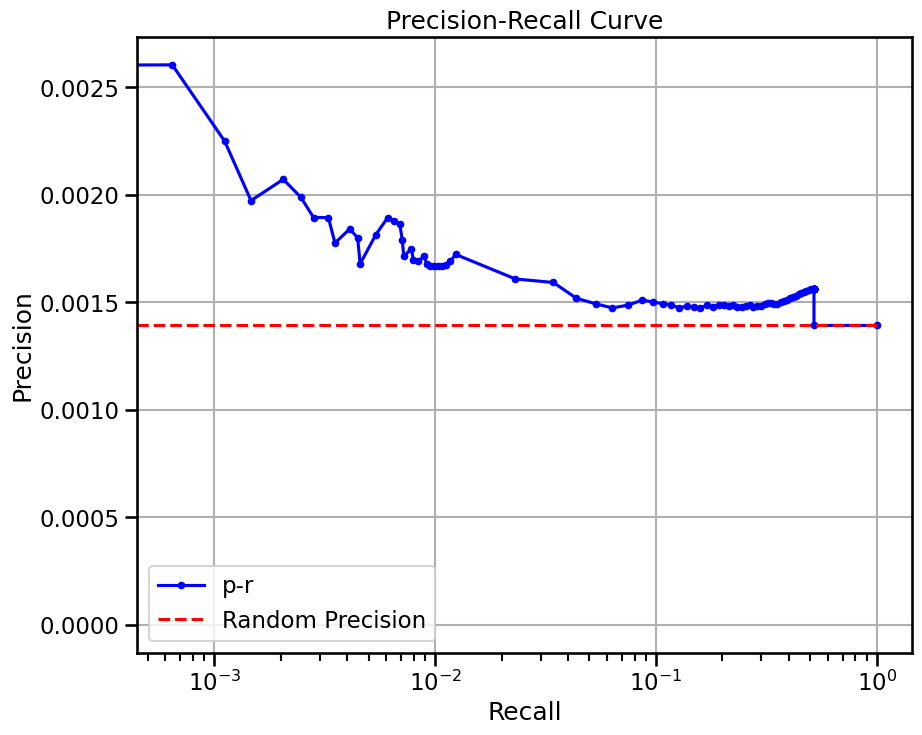

mesangial cell
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 22.21 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


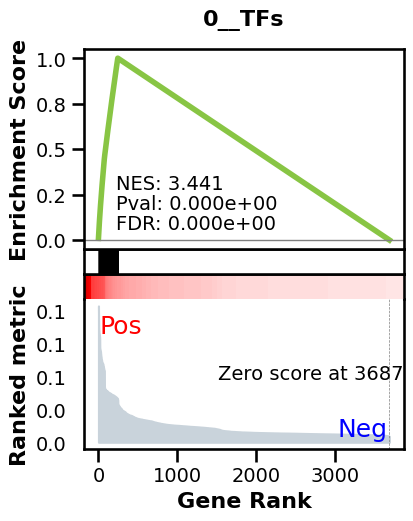

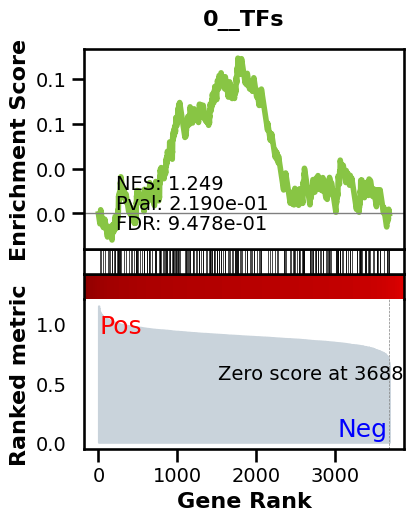

_________________________________________
TF specific enrichment


found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2670 genes
intersection pct: 0.7235772357723578
precision:  0.011091913568396578 
recall:  0.17904280959485827 
random precision: 0.0012226661221992553


  0%|          | 0/128 [00:00<?, ?it/s]

  7%|▋         | 9/128 [00:00<00:01, 83.47it/s]

 14%|█▍        | 18/128 [00:00<00:01, 83.54it/s]

 21%|██        | 27/128 [00:00<00:01, 83.66it/s]

 28%|██▊       | 36/128 [00:00<00:01, 83.68it/s]

 35%|███▌      | 45/128 [00:00<00:00, 83.66it/s]

 42%|████▏     | 54/128 [00:00<00:00, 83.64it/s]

 49%|████▉     | 63/128 [00:00<00:00, 83.62it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 83.62it/s]

 63%|██████▎   | 81/128 [00:00<00:00, 83.60it/s]

 70%|███████   | 90/128 [00:01<00:00, 83.60it/s]

 77%|███████▋  | 99/128 [00:01<00:00, 83.62it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 83.64it/s]

 91%|█████████▏| 117/128 [00:01<00:00, 83.66it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 83.64it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 83.58it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0027920152478152953
EPR: 7.145555325277299


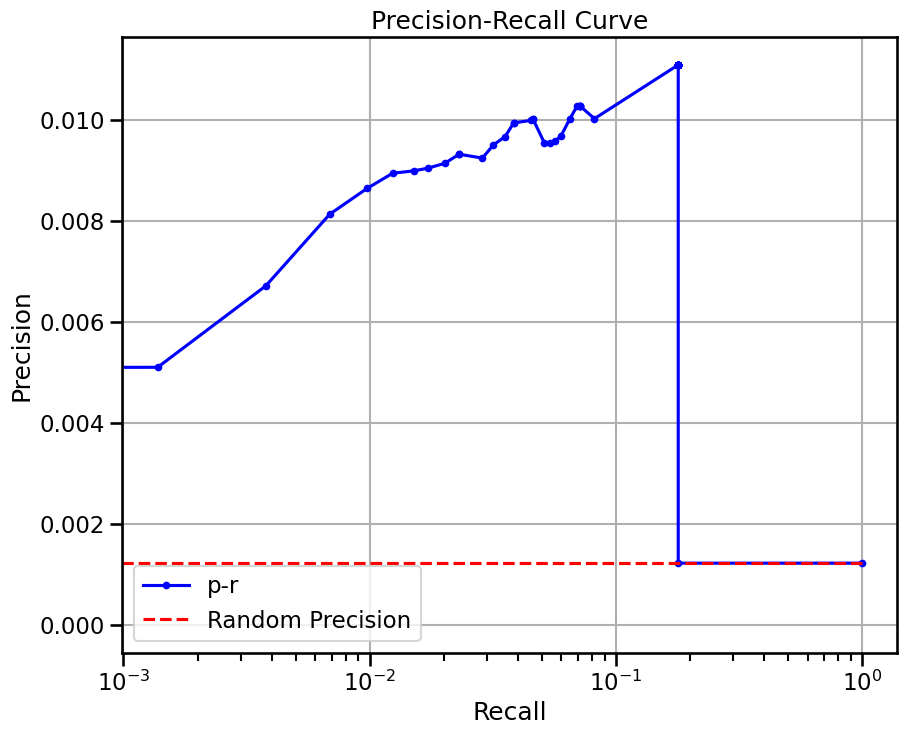

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 21.52 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


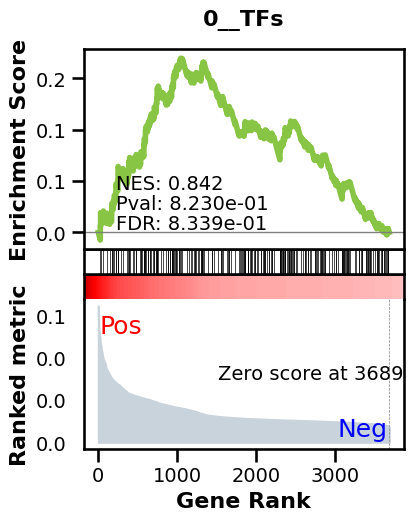

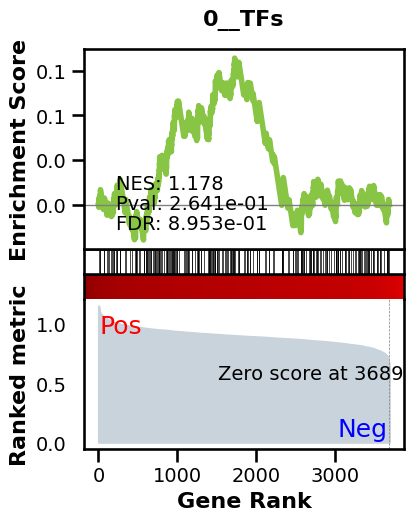

_________________________________________
TF specific enrichment


found some significant results for  2.380952380952381 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2670 genes
intersection pct: 0.7235772357723578
precision:  0.0015964465808944815 
recall:  0.031102949615517045 
random precision: 0.0012226661221992553


  0%|          | 0/128 [00:00<?, ?it/s]

  7%|▋         | 9/128 [00:00<00:01, 84.73it/s]

 14%|█▍        | 18/128 [00:00<00:01, 84.83it/s]

 21%|██        | 27/128 [00:00<00:01, 84.93it/s]

 28%|██▊       | 36/128 [00:00<00:01, 85.10it/s]

 35%|███▌      | 45/128 [00:00<00:00, 85.16it/s]

 42%|████▏     | 54/128 [00:00<00:00, 85.21it/s]

 49%|████▉     | 63/128 [00:00<00:00, 85.10it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 85.09it/s]

 63%|██████▎   | 81/128 [00:00<00:00, 85.11it/s]

 70%|███████   | 90/128 [00:01<00:00, 85.09it/s]

 77%|███████▋  | 99/128 [00:01<00:00, 85.15it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 85.19it/s]

 91%|█████████▏| 117/128 [00:01<00:00, 85.19it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 85.22it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 85.08it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012280730657178384
EPR: 0.7504978718813519


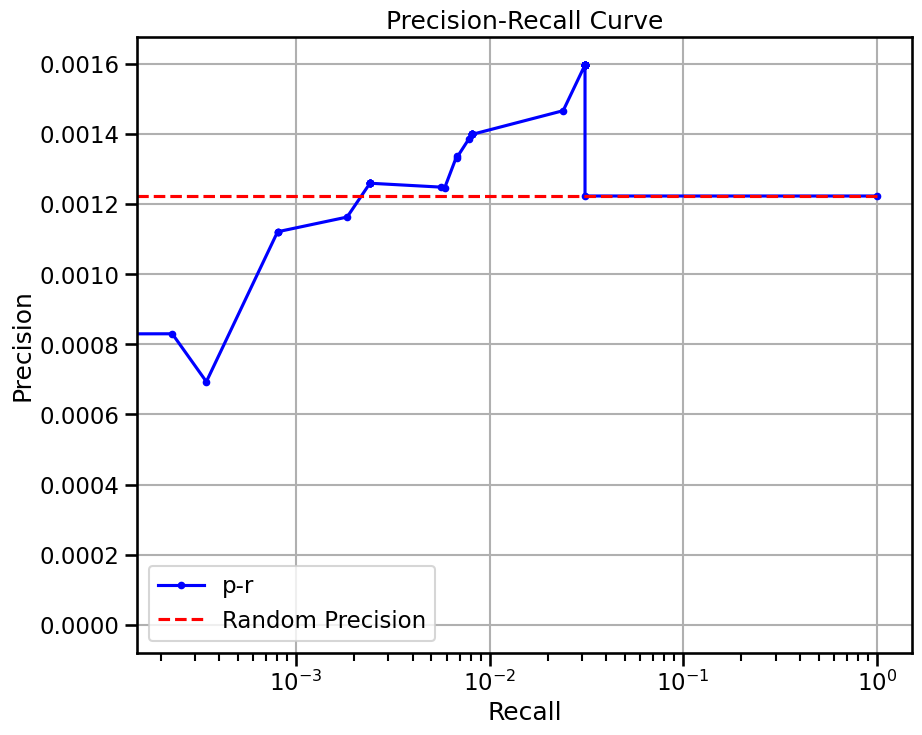

blood vessel smooth muscle cell
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 36.29 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


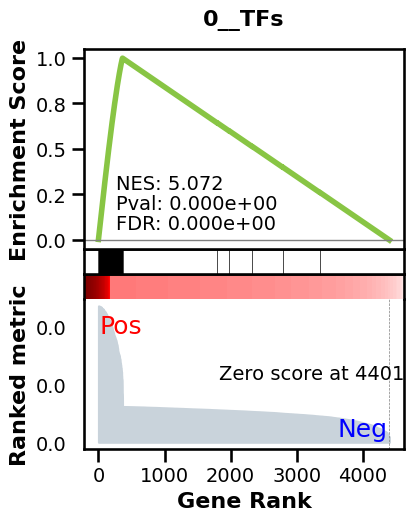

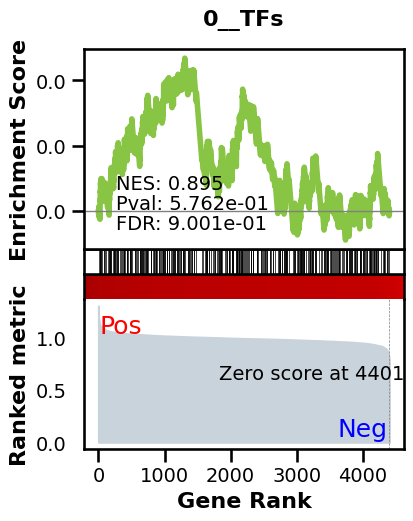

_________________________________________
TF specific enrichment


found some significant results for  3.7735849056603774 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3210 genes
intersection pct: 0.7292139936392549
precision:  0.00800766619815006 
recall:  0.3930826890161129 
random precision: 0.001644809332009176


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 56.43it/s]

  9%|▉         | 12/128 [00:00<00:02, 56.48it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.48it/s]

 19%|█▉        | 24/128 [00:00<00:01, 56.50it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.49it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.45it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.51it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.54it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.52it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.52it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.53it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.54it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.53it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.54it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.52it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 56.51it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 56.52it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 56.51it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 56.50it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 56.49it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 56.53it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.49it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005051697509862592
EPR: 6.576886698503719


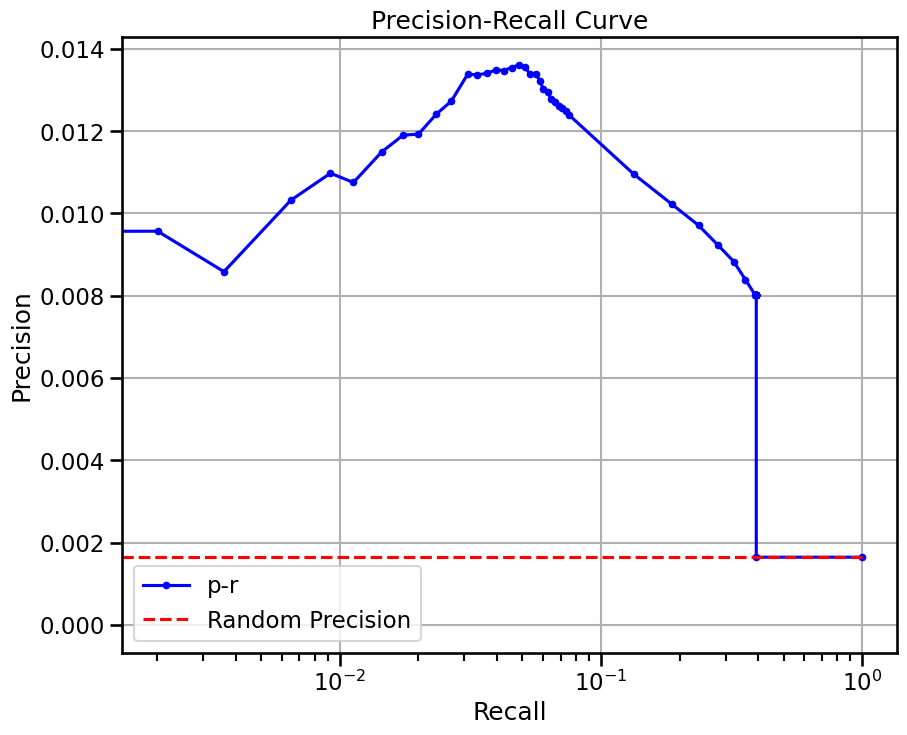

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 60.28 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


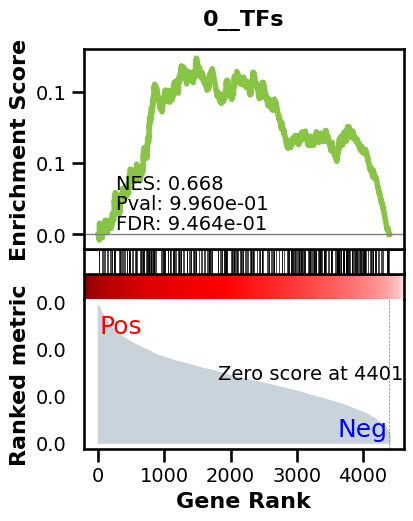

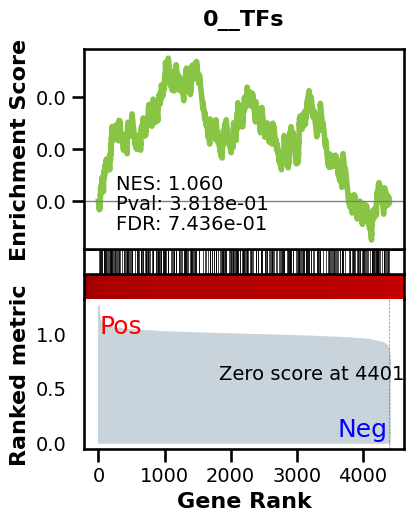

_________________________________________
TF specific enrichment


found some significant results for  5.660377358490566 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3210 genes
intersection pct: 0.7292139936392549
precision:  0.0021468221712246543 
recall:  0.37395974738830196 
random precision: 0.001644809332009176


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 57.66it/s]

  9%|▉         | 12/128 [00:00<00:02, 57.78it/s]

 14%|█▍        | 18/128 [00:00<00:01, 57.82it/s]

 19%|█▉        | 24/128 [00:00<00:01, 57.85it/s]

 23%|██▎       | 30/128 [00:00<00:01, 57.54it/s]

 28%|██▊       | 36/128 [00:00<00:01, 57.52it/s]

 33%|███▎      | 42/128 [00:00<00:01, 57.31it/s]

 38%|███▊      | 48/128 [00:00<00:01, 57.38it/s]

 42%|████▏     | 54/128 [00:00<00:01, 57.47it/s]

 47%|████▋     | 60/128 [00:01<00:01, 57.61it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 57.68it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 57.70it/s]

 61%|██████    | 78/128 [00:01<00:00, 57.70it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 57.74it/s]

 70%|███████   | 90/128 [00:01<00:00, 57.69it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 57.77it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 57.79it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 57.78it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 57.77it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 57.82it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 57.83it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 57.67it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017945948965873816
EPR: 1.112799178635425


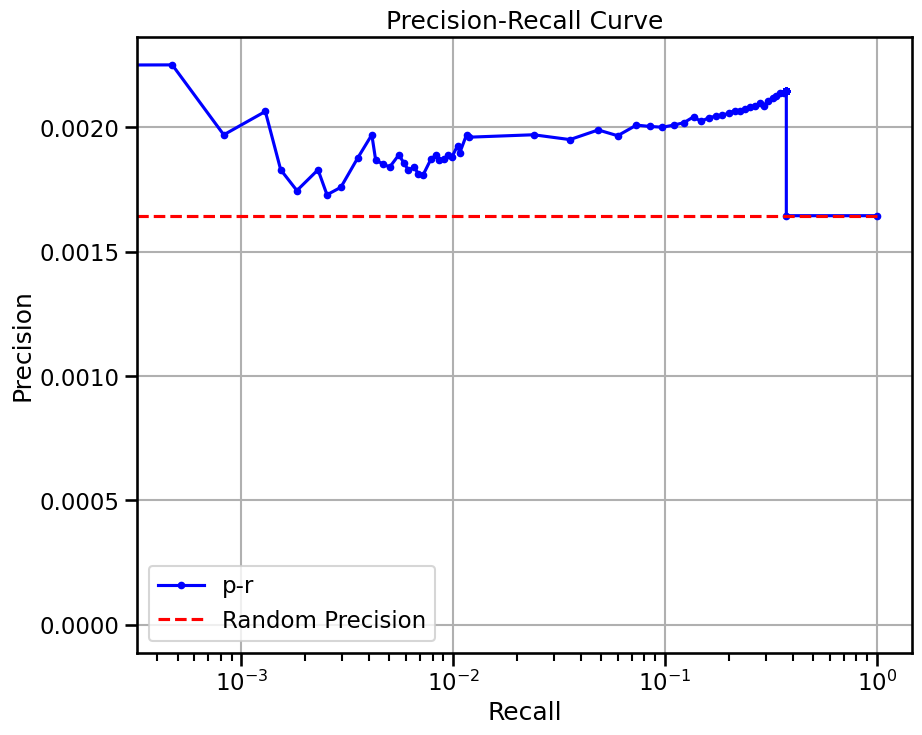

podocyte
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 45.51 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


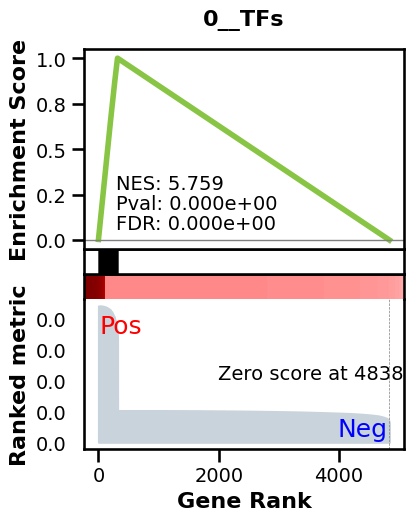

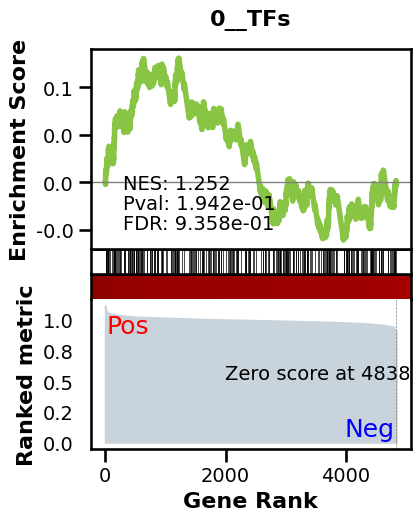

_________________________________________
TF specific enrichment


found some significant results for  2.127659574468085 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3487 genes
intersection pct: 0.720603430460839
precision:  0.008823233739504024 
recall:  0.45087330341210186 
random precision: 0.0015213461490683946


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 47.68it/s]

  8%|▊         | 10/128 [00:00<00:02, 47.81it/s]

 12%|█▏        | 15/128 [00:00<00:02, 47.91it/s]

 16%|█▌        | 20/128 [00:00<00:02, 47.87it/s]

 20%|█▉        | 25/128 [00:00<00:02, 47.80it/s]

 23%|██▎       | 30/128 [00:00<00:02, 47.88it/s]

 27%|██▋       | 35/128 [00:00<00:01, 47.86it/s]

 31%|███▏      | 40/128 [00:00<00:01, 47.89it/s]

 35%|███▌      | 45/128 [00:00<00:01, 47.84it/s]

 39%|███▉      | 50/128 [00:01<00:01, 47.81it/s]

 43%|████▎     | 55/128 [00:01<00:01, 47.81it/s]

 47%|████▋     | 60/128 [00:01<00:01, 47.80it/s]

 51%|█████     | 65/128 [00:01<00:01, 47.79it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 47.78it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 47.79it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 47.78it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 47.86it/s]

 70%|███████   | 90/128 [00:01<00:00, 47.82it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 47.81it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 47.85it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 47.89it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 47.95it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 41.68it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 43.35it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 44.58it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 46.92it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004928543810039289
EPR: 6.283590143146747


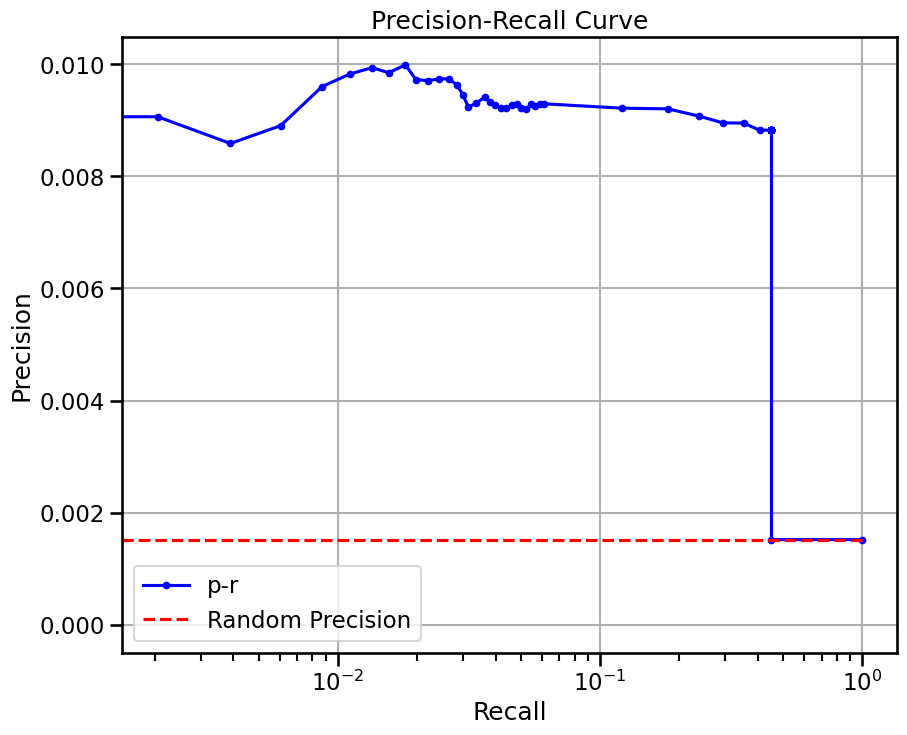

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 106.28 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


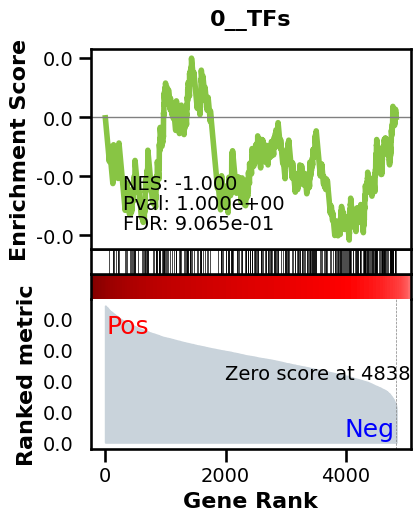

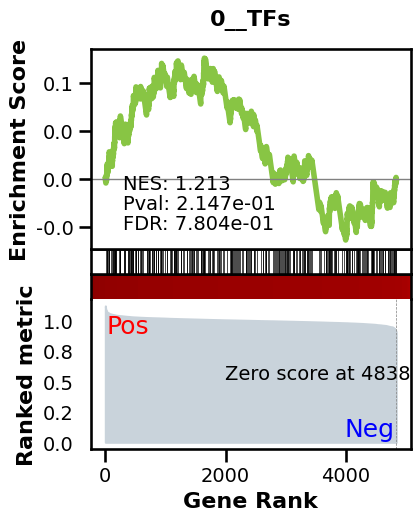

_________________________________________
TF specific enrichment


found some significant results for  2.127659574468085 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3487 genes
intersection pct: 0.720603430460839
precision:  0.0016667958980235683 
recall:  0.4684475206835019 
random precision: 0.0015213461490683946


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 49.49it/s]

  8%|▊         | 10/128 [00:00<00:02, 49.54it/s]

 12%|█▏        | 15/128 [00:00<00:02, 49.57it/s]

 16%|█▌        | 20/128 [00:00<00:02, 49.29it/s]

 20%|█▉        | 25/128 [00:00<00:02, 49.36it/s]

 23%|██▎       | 30/128 [00:00<00:01, 49.44it/s]

 27%|██▋       | 35/128 [00:00<00:01, 49.35it/s]

 31%|███▏      | 40/128 [00:00<00:01, 49.22it/s]

 35%|███▌      | 45/128 [00:00<00:01, 49.08it/s]

 39%|███▉      | 50/128 [00:01<00:01, 49.24it/s]

 43%|████▎     | 55/128 [00:01<00:01, 49.37it/s]

 47%|████▋     | 60/128 [00:01<00:01, 49.17it/s]

 51%|█████     | 65/128 [00:01<00:01, 49.15it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 49.13it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 49.27it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 49.19it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 49.13it/s]

 70%|███████   | 90/128 [00:01<00:00, 49.02it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 48.99it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 49.09it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 49.22it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 49.16it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 49.30it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 49.19it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 49.27it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 49.23it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0015336726079176932


EPR: 0.8170540002679245


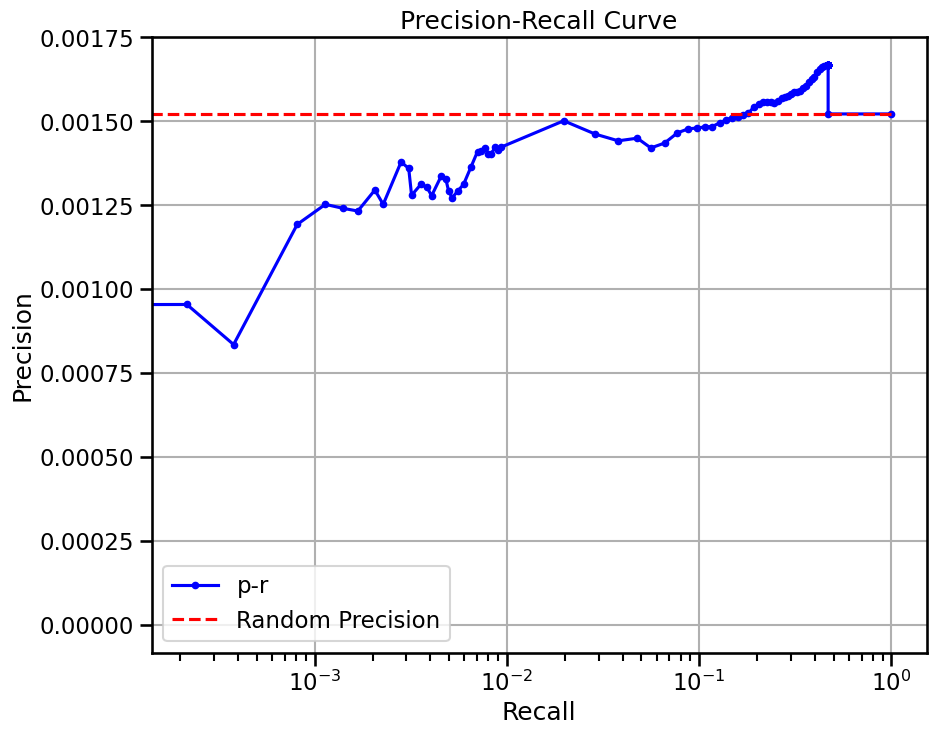

macrophage
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 27.15 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


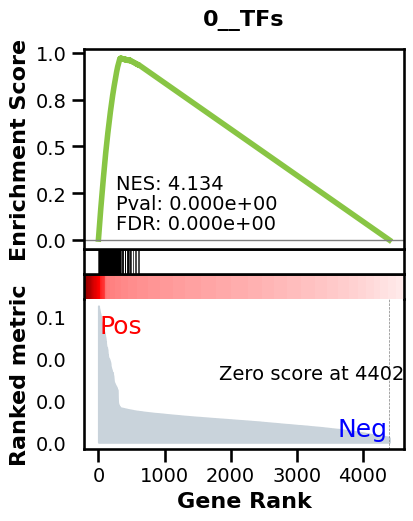

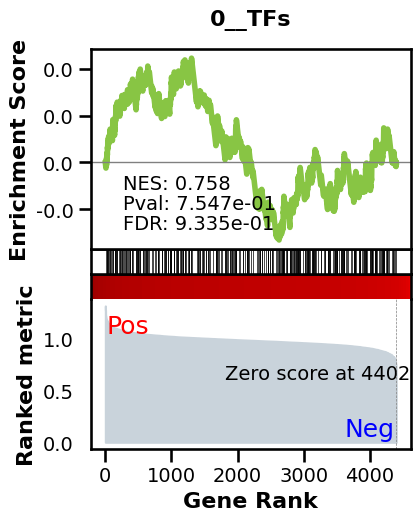

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3152 genes
intersection pct: 0.7158755394049512
precision:  0.009606729723012922 
recall:  0.3306022710938623 
random precision: 0.001400933069350315


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.85it/s]

  9%|▉         | 12/128 [00:00<00:01, 59.29it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.30it/s]

 19%|█▉        | 24/128 [00:00<00:01, 56.81it/s]

 23%|██▎       | 30/128 [00:00<00:01, 57.14it/s]

 28%|██▊       | 36/128 [00:00<00:01, 57.34it/s]

 33%|███▎      | 42/128 [00:00<00:01, 57.48it/s]

 38%|███▊      | 48/128 [00:00<00:01, 57.57it/s]

 42%|████▏     | 54/128 [00:00<00:01, 57.62it/s]

 47%|████▋     | 60/128 [00:01<00:01, 57.73it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 57.78it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 57.84it/s]

 61%|██████    | 78/128 [00:01<00:00, 57.82it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 57.82it/s]

 70%|███████   | 90/128 [00:01<00:00, 57.84it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 57.86it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 57.87it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 57.89it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 57.90it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 57.91it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 57.95it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 57.71it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004274459227029782
EPR: 6.936047786947196


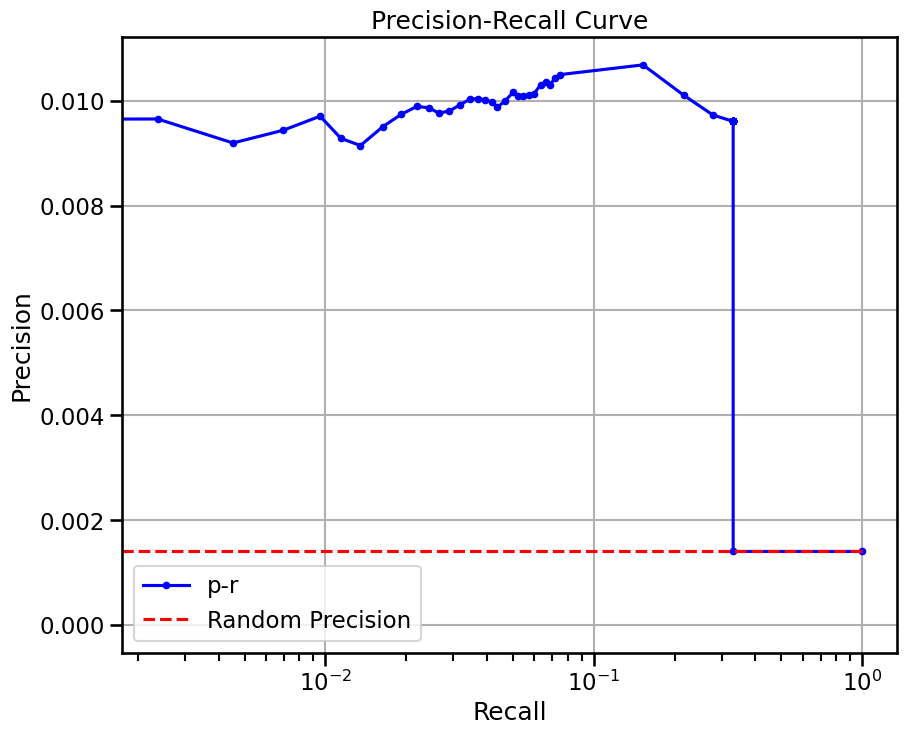

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 29.11 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


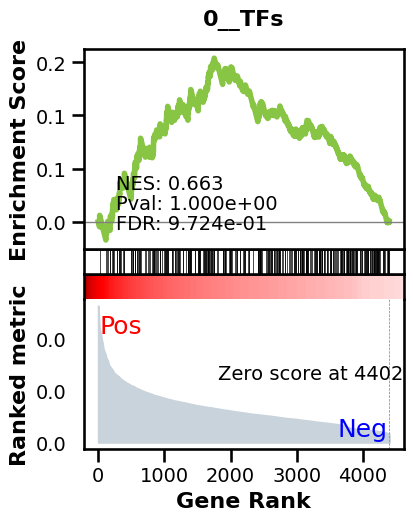

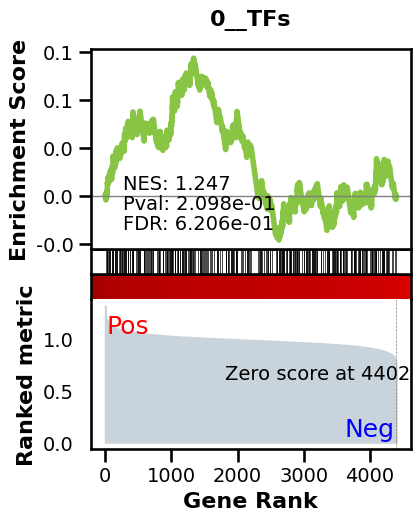

_________________________________________
TF specific enrichment


found some significant results for  7.317073170731708 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3152 genes
intersection pct: 0.7158755394049512
precision:  0.0018429650491313236 
recall:  0.1072301279287049 
random precision: 0.001400933069350315


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:02, 60.37it/s]

 11%|█         | 14/128 [00:00<00:01, 60.32it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.41it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.49it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.54it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.50it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.60it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.58it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.62it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.62it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.64it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.63it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.69it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.72it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.79it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.74it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.73it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.72it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.61it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014304433653382009
EPR: 1.1290421754625726


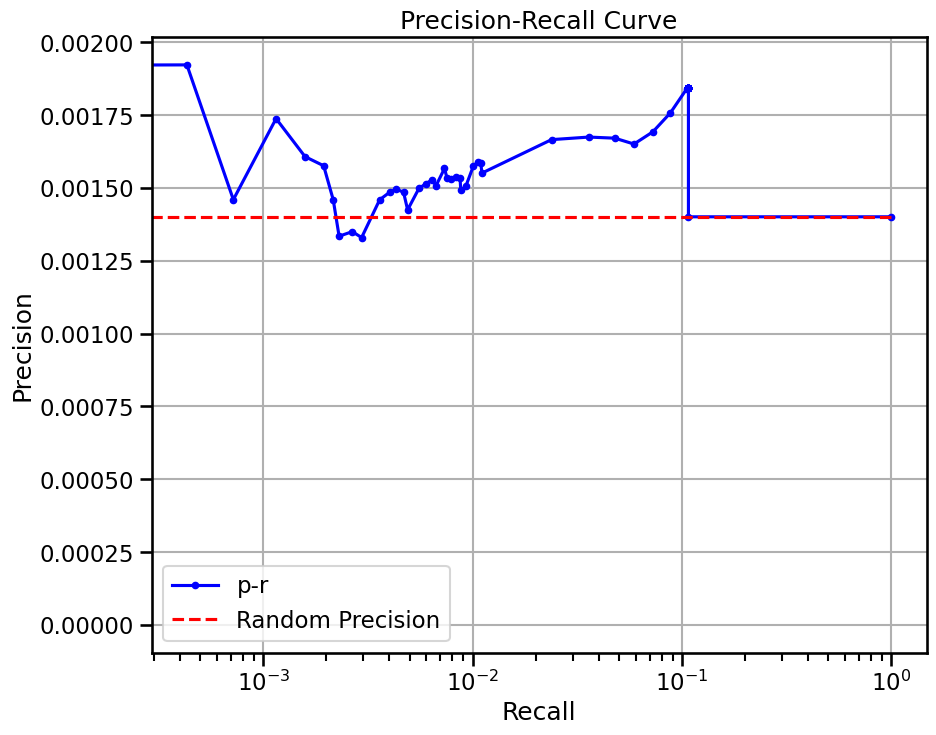

leukocyte
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 24.66 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


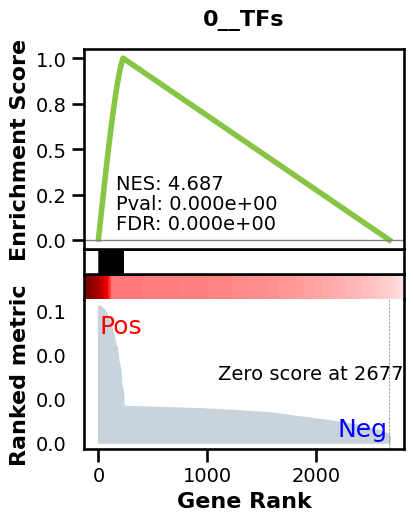

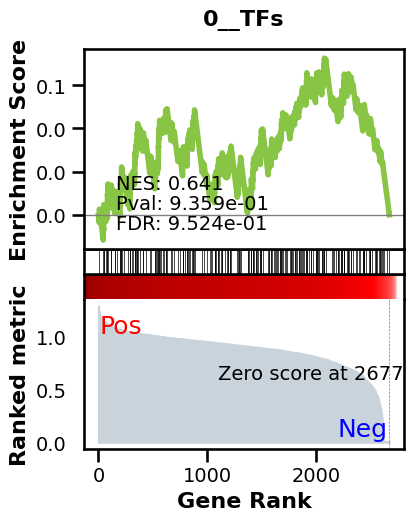

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 1801 genes
intersection pct: 0.6725168035847647
precision:  0.007822210962179452 
recall:  0.4293785310734463 
random precision: 0.001419581713862669


  0%|          | 0/128 [00:00<?, ?it/s]

 15%|█▍        | 19/128 [00:00<00:00, 187.76it/s]

 30%|██▉       | 38/128 [00:00<00:00, 187.99it/s]

 45%|████▍     | 57/128 [00:00<00:00, 188.08it/s]

 59%|█████▉    | 76/128 [00:00<00:00, 187.72it/s]

 74%|███████▍  | 95/128 [00:00<00:00, 187.67it/s]

 89%|████████▉ | 114/128 [00:00<00:00, 187.89it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 187.72it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005638778371211631
EPR: 14.291172122566772


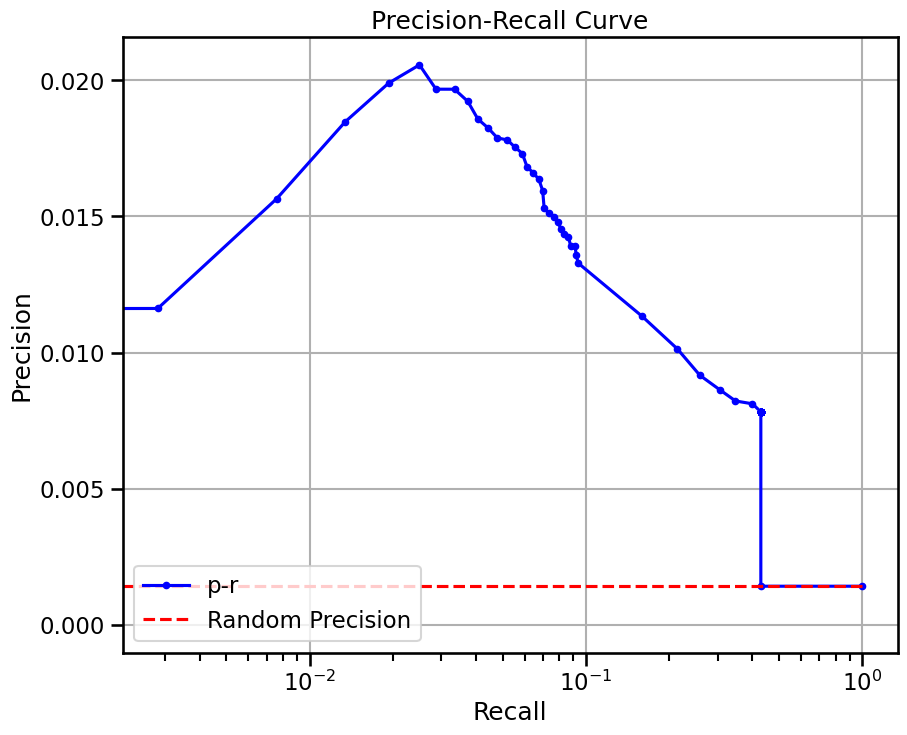

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 34.11 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


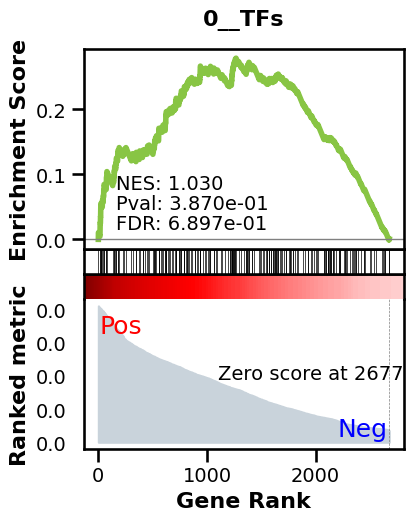

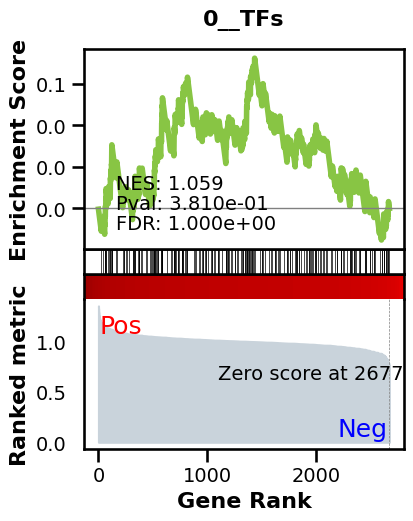

_________________________________________
TF specific enrichment


found some significant results for  5.2631578947368425 % TFs

_________________________________________
loading GT,  omnipath


intersection of 1801 genes
intersection pct: 0.6725168035847647
precision:  0.001865281483467206 
recall:  0.28878748370273793 
random precision: 0.001419581713862669


  0%|          | 0/128 [00:00<?, ?it/s]

 15%|█▍        | 19/128 [00:00<00:00, 188.66it/s]

 30%|██▉       | 38/128 [00:00<00:00, 189.35it/s]

 45%|████▍     | 57/128 [00:00<00:00, 189.21it/s]

 59%|█████▉    | 76/128 [00:00<00:00, 189.12it/s]

 74%|███████▍  | 95/128 [00:00<00:00, 189.21it/s]

 89%|████████▉ | 114/128 [00:00<00:00, 189.19it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 189.01it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001656892274003121
EPR: 1.3791206423656366


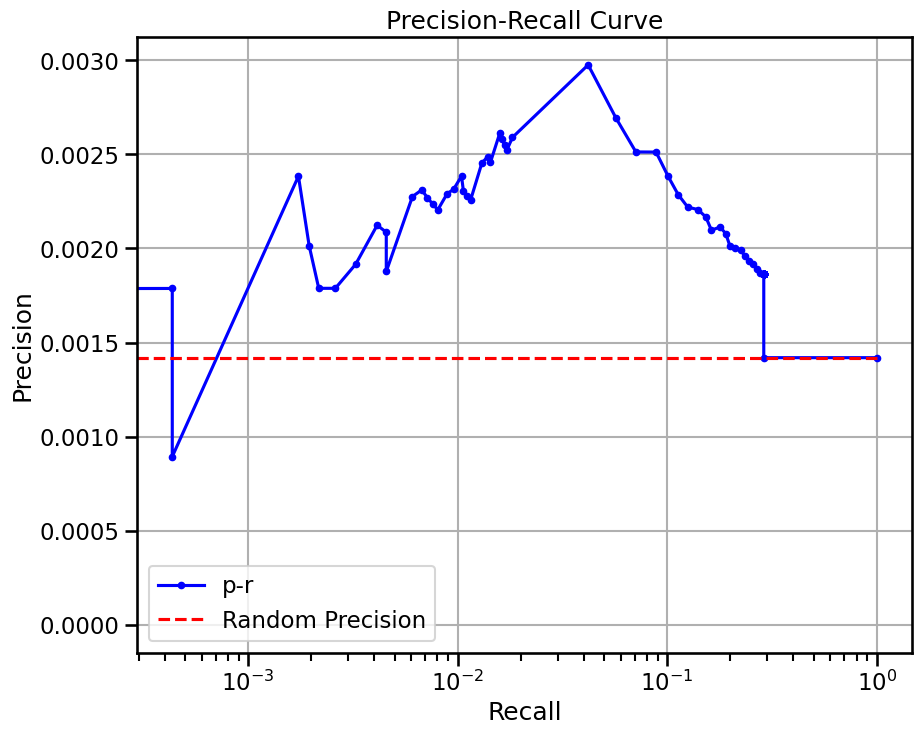

kidney interstitial fibroblast
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 30.17 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


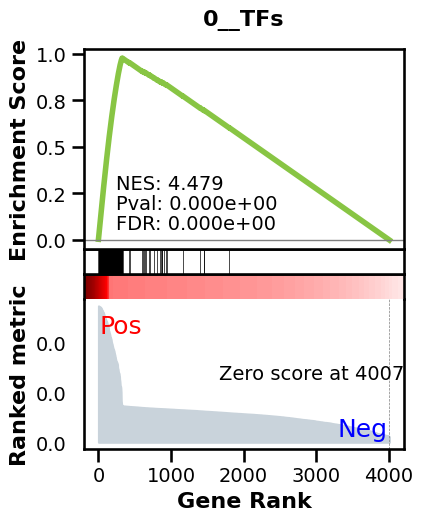

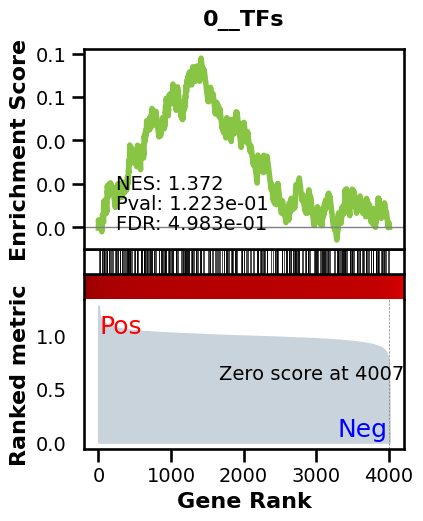

_________________________________________
TF specific enrichment


found some significant results for  9.30232558139535 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2862 genes
intersection pct: 0.7140718562874252
precision:  0.0094387533262605 
recall:  0.4110118146016359 
random precision: 0.0016125679668576004


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 70.88it/s]

 12%|█▎        | 16/128 [00:00<00:01, 70.91it/s]

 19%|█▉        | 24/128 [00:00<00:01, 69.74it/s]

 25%|██▌       | 32/128 [00:00<00:01, 70.28it/s]

 31%|███▏      | 40/128 [00:00<00:01, 70.52it/s]

 38%|███▊      | 48/128 [00:00<00:01, 70.68it/s]

 44%|████▍     | 56/128 [00:00<00:01, 70.26it/s]

 50%|█████     | 64/128 [00:00<00:00, 70.45it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 70.60it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 70.71it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 70.82it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 70.89it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 71.00it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 71.07it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 71.02it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 70.96it/s]

100%|██████████| 128/128 [00:01<00:00, 70.71it/s]

Area Under Precision-Recall Curve (AUPRC):  0.006241740566322734
EPR: 8.315423718112475


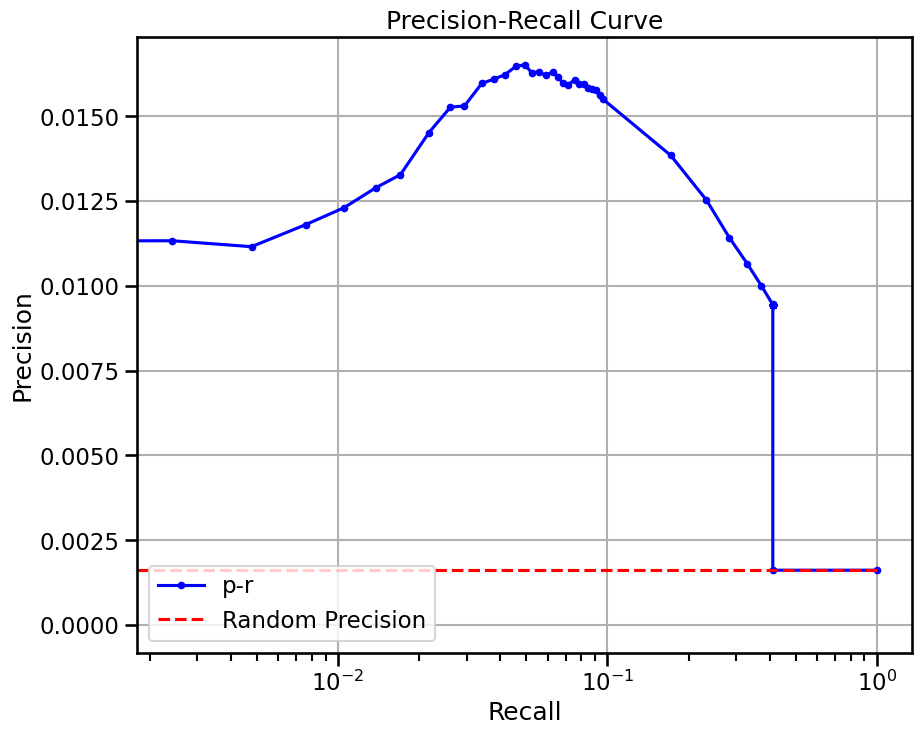

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 44.49 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


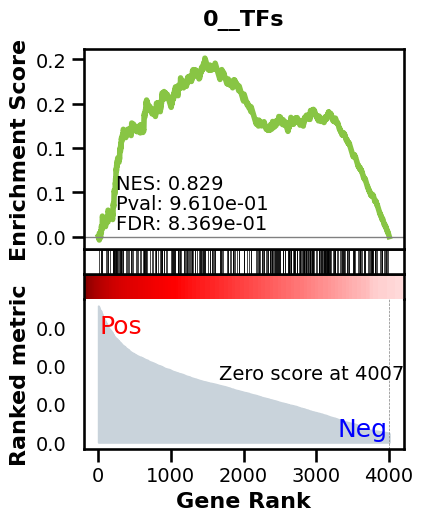

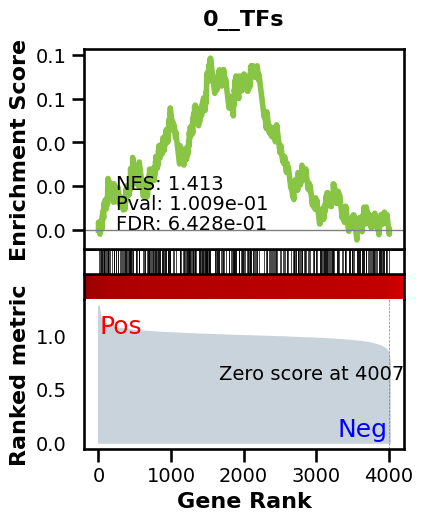

_________________________________________
TF specific enrichment


found some significant results for  6.976744186046512 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2862 genes
intersection pct: 0.7140718562874252
precision:  0.002411899080020633 
recall:  0.3222508330808846 
random precision: 0.0016125679668576004


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 71.84it/s]

 12%|█▎        | 16/128 [00:00<00:01, 71.82it/s]

 19%|█▉        | 24/128 [00:00<00:01, 71.84it/s]

 25%|██▌       | 32/128 [00:00<00:01, 71.86it/s]

 31%|███▏      | 40/128 [00:00<00:01, 71.84it/s]

 38%|███▊      | 48/128 [00:00<00:01, 71.86it/s]

 44%|████▍     | 56/128 [00:00<00:01, 71.82it/s]

 50%|█████     | 64/128 [00:00<00:00, 71.84it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 71.84it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 71.85it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 71.87it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 71.86it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 71.46it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 71.56it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 71.68it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 71.71it/s]

100%|██████████| 128/128 [00:01<00:00, 71.74it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018075641582656478
EPR: 1.127629069657664


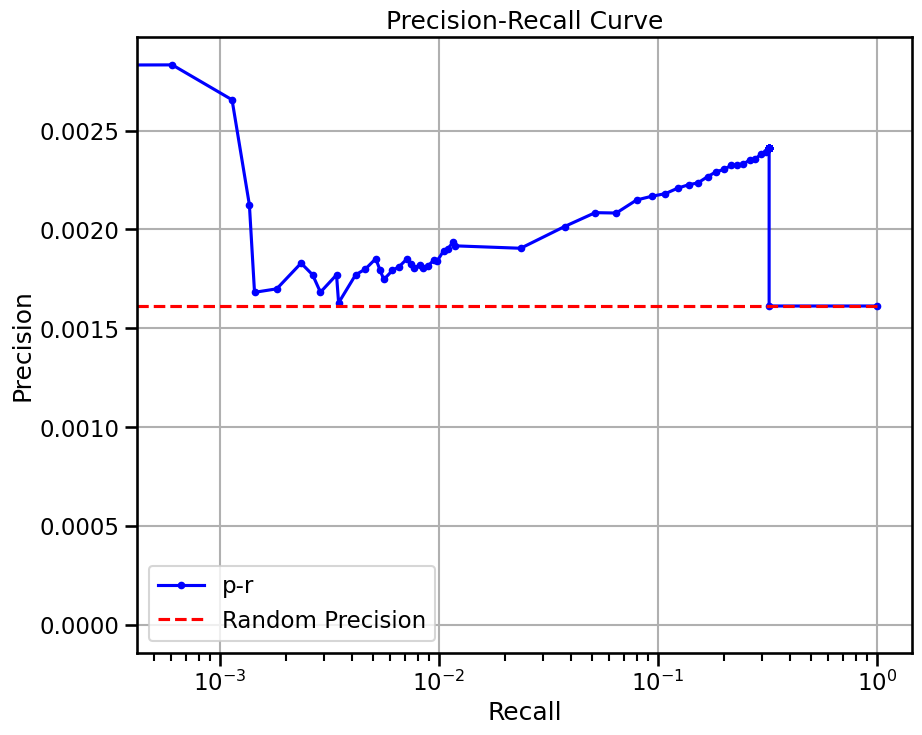

In [8]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    to_use = [x for x in to_use if x in genes]
    to_use = to_use[:NUM_GENES]
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS,  adata.var.index.isin(to_use)]
    print(celltype)
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                         do_auc=True, doplot=True).scprint_benchmark()

In [9]:
metrics

{'genie3_tf_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Kupffer cells',
   'celltype.gmt__Mesangial cells',
   'celltype.gmt__Hepatoblasts'],
  'TF_enr': True,
  'significant_enriched_TFtargets': 12.903225806451612,
  'precision': 0.004695277682597477,
  'recall': 0.3366297778824268,
  'rand_precision': 0.001085814360770578,
  'auprc': 0.002613214242507992,
  'epr': 6.13938154134158},
 'genie3_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__-intercalated cells (Collecting duct system)',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Connecting tubule cells',
   'celltype.gmt__Podocytes',
   'celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Me

In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name        EPR     AUPRC  \
0     kidney distal convoluted tubule epithelial cell   6.139382  0.002613   
1     kidney distal convoluted tubule epithelial cell   1.592287  0.001078   
2   kidney loop of Henle thick ascending limb epit...   4.068593  0.003189   
3   kidney loop of Henle thick ascending limb epit...   0.427749  0.001183   
4               kidney collecting duct principal cell  10.906750  0.005002   
5               kidney collecting duct principal cell   1.476408  0.001456   
6                                      mesangial cell   7.145555  0.002792   
7                                      mesangial cell   0.750498  0.001228   
8                     blood vessel smooth muscle cell   6.576887  0.005052   
9                     blood vessel smooth muscle cell   1.112799  0.001795   
10                                           podocyte   6.283590  0.004929   
11                                           podocyte   0.817054  0.001534   
12                                         macrophage   6.936048  0.004274   
13                                         macrophage   1.129042  0.001430   
14                                          leukocyte  14.291172  0.005639   
15                                          leukocyte   1.379121  0.001657   
16                     kidney interstitial fibroblast   8.315424  0.006242   
17                     kidney interstitial fibroblast   1.127629  0.001808   

        RAND    TF_targ  TF_enr  TF_only  
0   0.001086  12.903226    True     True  
1   0.001086   3.225806   False    False  
2   0.001211   2.500000    True     True  
3   0.001211   7.500000   False    False  
4   0.001392   1.428571    True     True  
5   0.001392   4.285714   False    False  
6   0.001223   7.142857    True     True  
7   0.001223   2.380952   False    False  
8   0.001645   3.773585    True     True  
9   0.001645   5.660377   False    False  
10  0.001521   2.127660    True     True  
11  0.001521   2.127660   False    False  
12  0.001401   0.000000    True     True  
13  0.001401   7.317073   False    False  
14  0.001420   0.000000    True     True  
15  0.001420   5.263158   False    False  
16  0.001613   9.302326    True     True  
17  0.001613   6.976744   False    False